In [1]:
# I imported everything that was imported in the last courses that's why there is so many extra packages and then 
# I added on what I needed. In addition I didn't figure out what how to use the template because you coulnd't download it so
# That's why I did it like this
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
import cv2
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

#This is because df.append is not available in future versions but here it works so I use it and printing 300 warning would make
#the PDF-file unreadable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# List all the image files in the directory
image_files = [f for f in os.listdir('data/Arborio') if f.endswith('.jpg')]
image_files2 = [f for f in os.listdir('data/Basmati') if f.endswith('.jpg')]
image_files3 = [f for f in os.listdir('data/Jasmine') if f.endswith('.jpg')]
# Randomly select 100 image files
selected_files = random.sample(image_files, 100)
selected_files2 = random.sample(image_files2,100)
selected_files3 = random.sample(image_files3,100)
# Create an empty DataFrame
df = pd.DataFrame(columns=['image'])
df2 = pd.DataFrame(columns=['image'])
df3 = pd.DataFrame(columns=['image'])



# Load each selected image file into a numpy array and add it as a new row in the DataFrame
for file in selected_files:
    image = np.array(Image.open('data/Arborio/' + file))
    #convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    #threshold the greyscale image to create a binary image
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    #find the contours in the binary language
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    df = df.append({'image': image, 'contour' : contours}, ignore_index=True)
#what happens is describded above
for file in selected_files2:
    image = np.array(Image.open('data/Basmati/' + file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    df2 = df2.append({'image': image, 'contour' : contours}, ignore_index=True)
#what happens is describded above
for file in selected_files3:
    image = np.array(Image.open('data/Jasmine/' + file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)                           
    df3 = df3.append({'image': image, 'contour' : contours}, ignore_index=True)




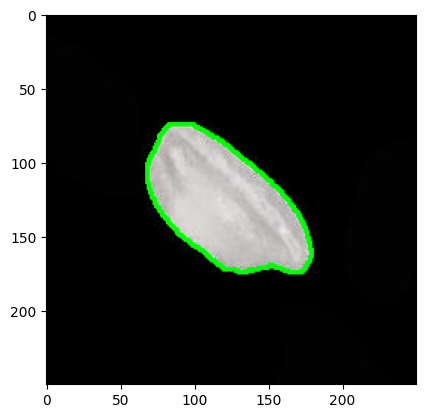

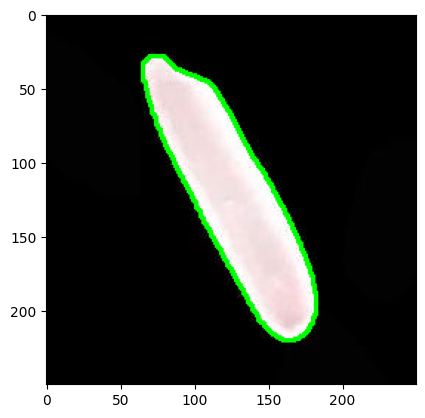

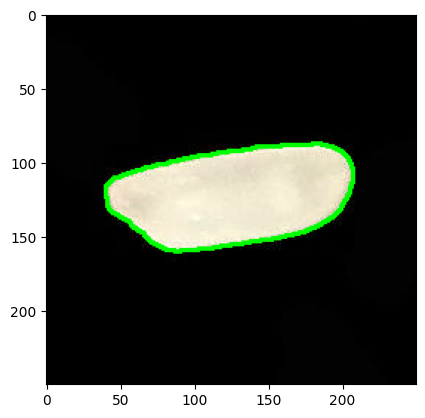

In [3]:
#create 3 example images
image = df.at[0, 'image']
contours = df.at[0, 'contour']
image_with_contours = cv2.drawContours(image, contours, -1, (0,255,0), 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.show()

image2 = df2.at[0, 'image']
contours2 = df2.at[0, 'contour']
image_with_contours = cv2.drawContours(image2, contours2, -1, (0,255,0), 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.show()

image3 = df3.at[0, 'image']
contours3 = df3.at[0, 'contour']
image_with_contours = cv2.drawContours(image3, contours3, -1, (0,255,0), 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
#part2:
# List all the image files in the directory
image_files = [f for f in os.listdir('data/Arborio') if f.endswith('.jpg')]
image_files2 = [f for f in os.listdir('data/Basmati') if f.endswith('.jpg')]
image_files3 = [f for f in os.listdir('data/Jasmine') if f.endswith('.jpg')]
# Randomly select 100 image files
selected_files = random.sample(image_files, 100)
selected_files2 = random.sample(image_files2,100)
selected_files3 = random.sample(image_files3,100)
# Create an empty DataFrame
df = pd.DataFrame(columns=['image'])
df2 = pd.DataFrame(columns=['image'])
df3 = pd.DataFrame(columns=['image'])


# Load each selected image file into a numpy array, find its contour, and add features as new columns in the DataFrame

#I don'd repeat what happens in the last cell just adding information about the new parts
for file in selected_files:
    image = np.array(Image.open('data/Arborio/' + file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #choosing the largest contour
    cnt = contours[0]
    #create a binary mask from the countor and apply the mask to the greyscale image
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    
    #calculating the mean
    blue_mean = np.mean(np.array(np.array(image[:,:,0]) * mask))
    green_mean = np.mean(np.array(np.array(image[:,:,1]) * mask))
    red_mean = np.mean(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the variance
    blue_var = np.var(np.array(np.array(image[:,:,0]) * mask))
    green_var = np.var(np.array(np.array(image[:,:,1]) * mask))
    red_var = np.var(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the skewness
    blue_skew = skew(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_skew = skew(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_skew = skew(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the kurtosis
    blue_kur = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_kur = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_kur = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the Entropy
    blue_ent = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_ent = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_ent = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #ellipse
    ellipse = cv2.fitEllipse(cnt)
    major_axis_length = ellipse[1][0]
    minor_axis_length = ellipse[1][1]
    
    #area and length
    area = cv2.contourArea(cnt)
    perimeter =cv2.arcLength(cnt,True)
    
    #roundness and aspect ratio
    a, b = ellipse[1][0]/2, ellipse[1][1]/2
    circumference = np.pi * (3*(a + b) - np.sqrt((3*a + b)*(a + 3*b)))
    roundness = perimeter / circumference
    aspect_ratio = major_axis_length/minor_axis_length
    
    #Adding everything to a dataframe
    df = df.append({'image': image, 'R mean': red_mean, 'G mean': green_mean, 'B mean': blue_mean, 'R variance' : red_var, 'G variance': green_var, 'B variance': blue_var, 'R skewness': red_skew, 'G skewness': green_skew, 'B skewness': blue_skew, 'R kurtosis': red_kur, 'G kurtosis': green_kur, 'B kurtosis': blue_kur, 'R entropy': red_ent, 'G entropy': green_ent, 'B entropy': blue_ent,'ellipse': ellipse,'major_axis_length': major_axis_length, 'minor_axis_length': minor_axis_length, 'area':area, 'perimeter':perimeter, 'roundness':roundness, 'aspect_ratio':aspect_ratio}, ignore_index=True)

for file in selected_files2:
    image = np.array(Image.open('data/Basmati/' + file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
   
    #calculating the mean
    blue_mean = np.mean(np.array(np.array(image[:,:,0]) * mask))
    green_mean = np.mean(np.array(np.array(image[:,:,1]) * mask))
    red_mean = np.mean(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the variance
    blue_var = np.var(np.array(np.array(image[:,:,0]) * mask))
    green_var = np.var(np.array(np.array(image[:,:,1]) * mask))
    red_var = np.var(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the skewness
    blue_skew = skew(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_skew = skew(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_skew = skew(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the kurtosis
    blue_kur = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_kur = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_kur = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the Entropy
    blue_ent = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_ent = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_ent = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #ellipse
    ellipse = cv2.fitEllipse(cnt)
    major_axis_length = ellipse[1][0]
    minor_axis_length = ellipse[1][1]
    
    #area and length
    area = cv2.contourArea(cnt)
    perimeter =cv2.arcLength(cnt,True)
    
    #roundness and aspect ratio
    a, b = ellipse[1][0]/2, ellipse[1][1]/2
    circumference = np.pi * (3*(a + b) - np.sqrt((3*a + b)*(a + 3*b)))
    roundness = perimeter / circumference
    aspect_ratio = major_axis_length/minor_axis_length
    
    df2 = df2.append({'image': image, 'R mean': red_mean, 'G mean': green_mean, 'B mean': blue_mean, 'R variance' : red_var, 'G variance': green_var, 'B variance': blue_var, 'R skewness': red_skew, 'G skewness': green_skew, 'B skewness': blue_skew, 'R kurtosis': red_kur, 'G kurtosis': green_kur, 'B kurtosis': blue_kur, 'R entropy': red_ent, 'G entropy': green_ent, 'B entropy': blue_ent,'ellipse': ellipse, 'major_axis_length': major_axis_length, 'minor_axis_length': minor_axis_length, 'area':area, 'perimeter':perimeter, 'roundness':roundness, 'aspect_ratio':aspect_ratio}, ignore_index=True)

for file in selected_files3:
    image = np.array(Image.open('data/Jasmine/' + file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    
    #calculating the mean
    blue_mean = np.mean(np.array(np.array(image[:,:,0]) * mask))
    green_mean = np.mean(np.array(np.array(image[:,:,1]) * mask))
    red_mean = np.mean(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the variance
    blue_var = np.var(np.array(np.array(image[:,:,0]) * mask))
    green_var = np.var(np.array(np.array(image[:,:,1]) * mask))
    red_var = np.var(np.array(np.array(image[:,:,2]) * mask))
    
    #calculating the skewness
    blue_skew = skew(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_skew = skew(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_skew = skew(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the kurtosis
    blue_kur = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_kur = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_kur = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #calculating the Entropy
    blue_ent = kurtosis(np.array(np.array(image[:,:,0]) * mask).flatten())
    green_ent = kurtosis(np.array(np.array(image[:,:,1]) * mask).flatten())
    red_ent = kurtosis(np.array(np.array(image[:,:,2]) * mask).flatten())
    
    #ellipse
    ellipse = cv2.fitEllipse(cnt)
    major_axis_length = ellipse[1][0]
    minor_axis_length = ellipse[1][1]
    
    #area and length
    area = cv2.contourArea(cnt)
    perimeter =cv2.arcLength(cnt,True)
    
    #roundness and aspect ratio
    a, b = ellipse[1][0]/2, ellipse[1][1]/2
    circumference = np.pi * (3*(a + b) - np.sqrt((3*a + b)*(a + 3*b)))
    roundness = perimeter / circumference
    aspect_ratio = major_axis_length/minor_axis_length
    
    df3 = df3.append({'image': image, 'R mean': red_mean, 'G mean': green_mean, 'B mean': blue_mean, 'R variance' : red_var, 'G variance': green_var, 'B variance': blue_var, 'R skewness': red_skew, 'G skewness': green_skew, 'B skewness': blue_skew, 'R kurtosis': red_kur, 'G kurtosis': green_kur, 'B kurtosis': blue_kur, 'R entropy': red_ent, 'G entropy': green_ent, 'B entropy': blue_ent, 'ellipse': ellipse, 'major_axis_length': major_axis_length, 'minor_axis_length': minor_axis_length, 'area':area, 'perimeter':perimeter, 'roundness':roundness, 'aspect_ratio':aspect_ratio}, ignore_index=True)

#The output complains about the df.append method that it will be removed from pandas in a future version but I use it here

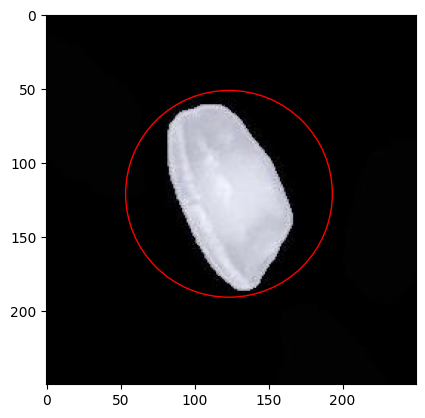

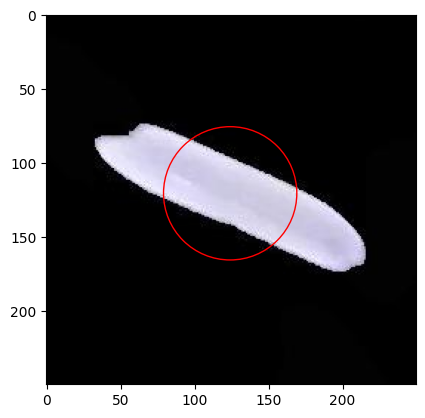

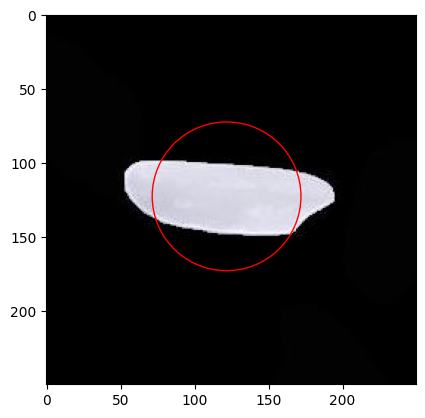

In [5]:
#drawing 3 example images
imag = df.at[0, 'image']
ellipse = df.at[0, 'ellipse']
plt.imshow(imag)
plt.gca().add_artist(plt.Circle(ellipse[0], ellipse[1][0], color='red', fill=False))
plt.show()

imag2 = df2.at[0, 'image']
ellipse2 = df2.at[0, 'ellipse']
plt.imshow(imag2)
plt.gca().add_artist(plt.Circle(ellipse2[0], ellipse2[1][0], color='red', fill=False))
plt.show()

imag3 = df3.at[0, 'image']
ellipse3 = df3.at[0, 'ellipse']
plt.imshow(imag3)
plt.gca().add_artist(plt.Circle(ellipse3[0], ellipse3[1][0], color='red', fill=False))
plt.show()



In [6]:
#making a big dataframe and saving it in the 'trainin_data'-file
df = df.assign(rice_species = 'Arborio')
df2 = df2.assign(rice_species = 'Basmati')
df3 = df3.assign(rice_species = 'Jasmine')
final_dataframe = pd.concat([df,df2,df3],ignore_index = True)
print(final_dataframe)
final_dataframe.to_csv('training_data/file.csv')




                                                 image  B entropy  B kurtosis  \
0    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   8.629937    8.629937   
1    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  20.667593   20.667593   
2    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   7.361321    7.361321   
3    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   6.760118    6.760118   
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   8.449227    8.449227   
..                                                 ...        ...         ...   
295  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   4.237491    4.237491   
296  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  35.988552   35.988552   
297  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  16.704885   16.704885   
298  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  16.018300   16.018300   
299  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   8.589232    8.589232   

       B mean  B skewness  